<a href="https://colab.research.google.com/github/Harshithakulal238/Miniproject_Bioshield/blob/main/BioShield_final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

dataset_dir = '/content/drive/MyDrive/invasives_dataset'

for folder in sorted(os.listdir(dataset_dir)):
    folder_path = os.path.join(dataset_dir, folder)
    if os.path.isdir(folder_path):
        num_images = len([
            f for f in os.listdir(folder_path)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        print(f"{folder}: {num_images} images")


Acacia_dealbata: 500 images
Acacia_mearnsii: 500 images
Ageratina_adenophora: 500 images
Ageratum_conyzoides: 500 images
Alternanthera_philoxeroides: 500 images
Alternanthera_sessilis: 500 images
Amaranthus_spinosus: 500 images
Amaranthus_viridis: 500 images
Argemone_mexicana: 500 images
Argemone_ochroleuca: 500 images
Biancaea_decapetala: 500 images
Bidens_pilosa: 500 images
Caesalpinia_decapetala: 500 images
Caesalpinia_pulcherrima: 500 images
Calotropis_procera: 500 images
Cassia_occidentalis: 500 images
Cassia_uniflora: 500 images
Centratherum_punctatum: 500 images
Clidemia_hirta: 500 images
Coronopus_didymus: 500 images
Croton_bonplandianus: 500 images
Cynodon_dactylon: 500 images
Datura_stramonium: 500 images
Eupatorium_adenophorum: 500 images
Euphorbia_heterophylla: 500 images
Hyptis_suaveolens: 500 images
Ipomoea_carnea: 500 images
Lantana_camara: 500 images
Leucaena_leucocephala: 500 images
Opuntia_stricta: 500 images
Senna_tora: 500 images
Sida_acuta: 500 images
Sida_cordifol

In [8]:
# Step 2 — Import libraries
import os
import tensorflow as tf
from tensorflow.keras import layers, models, applications, callbacks
import matplotlib.pyplot as plt

In [9]:
# Step 3 — Check GPU availability
device_name = tf.test.gpu_device_name()
if device_name:
    print("✅ GPU detected:", device_name)
else:
    print("❌ No GPU found. Go to Runtime → Change runtime type → Select GPU")


✅ GPU detected: /device:GPU:0


In [10]:
# Step 4 — Dataset path
dataset_dir = '/content/drive/MyDrive/invasives_dataset'

# Folders you want to exclude
excluded_classes = [
    'Alternanthera_sessilis',
    'Argemone_ochroleuca',
    'Caesalpinia_pulcherrima',
    'Cassia_uniflora',
    'Centratherum_punctatum',
    'Coronopus_didymus',
    'Cynodon_dactylon',
    'Euphorbia_heterophylla',
    'Eichhornia_crassipes',
    'Fallopia_japonica',
    'Pueraria_montana',
    'Senna_tora',
    'Sida_acuta',
    'Sida_cordifolia',
    'Xanthium_strumarium',
    'Opuntia_stricta',
    'Hyptis_suaveolens',
    'invasives_dataset'
]


In [12]:
# Step 5 — Include only the desired folders
included_folders = [
    f for f in os.listdir(dataset_dir)
    if os.path.isdir(os.path.join(dataset_dir, f)) and f not in excluded_classes
]

print("✅ Included classes:", included_folders)
print("Total included:", len(included_folders))


✅ Included classes: ['Lantana_camara', 'Acacia_mearnsii', 'Ageratina_adenophora', 'Ageratum_conyzoides', 'Alternanthera_philoxeroides', 'Amaranthus_spinosus', 'Amaranthus_viridis', 'Argemone_mexicana', 'Bidens_pilosa', 'Caesalpinia_decapetala', 'Calotropis_procera', 'Cassia_occidentalis', 'Clidemia_hirta', 'Croton_bonplandianus', 'Datura_stramonium', 'Ipomoea_carnea', 'Leucaena_leucocephala', 'Sphagneticola_trilobata', 'Acacia_dealbata', 'Biancaea_decapetala', 'Eupatorium_adenophorum']
Total included: 21


In [14]:
#step 6
import shutil

filtered_dataset_dir = '/content/filtered_dataset'

# Remove existing filtered folder if it already exists
if os.path.exists(filtered_dataset_dir):
    shutil.rmtree(filtered_dataset_dir)

os.makedirs(filtered_dataset_dir, exist_ok=True)

for folder in included_folders:
    src = os.path.join(dataset_dir, folder)
    dst = os.path.join(filtered_dataset_dir, folder)
    os.symlink(src, dst)  # recreate symbolic links safely


In [15]:
# Step 7 — Load dataset with augmentation for higher accuracy
img_size = (224, 224)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    filtered_dataset_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    filtered_dataset_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)


Found 10500 files belonging to 21 classes.
Using 8400 files for training.
Found 10500 files belonging to 21 classes.
Using 2100 files for validation.


In [16]:
# Step 8 — Add data augmentation (helps model generalize better)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.1)
])


In [17]:
# Step 9 — Prefetch for faster GPU feeding
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [22]:
#step 10
import os
import tensorflow as tf
from tensorflow.keras import layers, models

# ✅ Use your actual dataset path
train_dir = "/content/filtered_dataset"  # or "/content/drive/MyDrive/invasives_dataset"

# ✅ Get class names directly from folders
class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])
num_classes = len(class_names)

print("Detected classes:", class_names)
print("Number of classes:", num_classes)

# ✅ Create the model
model = models.Sequential([
    tf.keras.applications.EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3),
        pooling='avg'
    ),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')
])


Detected classes: ['Acacia_dealbata', 'Acacia_mearnsii', 'Ageratina_adenophora', 'Ageratum_conyzoides', 'Alternanthera_philoxeroides', 'Amaranthus_spinosus', 'Amaranthus_viridis', 'Argemone_mexicana', 'Biancaea_decapetala', 'Bidens_pilosa', 'Caesalpinia_decapetala', 'Calotropis_procera', 'Cassia_occidentalis', 'Clidemia_hirta', 'Croton_bonplandianus', 'Datura_stramonium', 'Eupatorium_adenophorum', 'Ipomoea_carnea', 'Lantana_camara', 'Leucaena_leucocephala', 'Sphagneticola_trilobata']
Number of classes: 21


In [23]:
# Step 11 — Define Callbacks (to increase accuracy and reduce training time)
early_stop = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=4,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-6
)

checkpoint = callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/invasives_best_model.keras',
    monitor='val_accuracy',
    save_best_only=True
)


In [27]:
# ✅ Step 11.5 — Compile the model again (must be done before training)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [29]:
# Step 12 — Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,  # adjust as needed
    verbose=1,
    callbacks=[early_stop, reduce_lr, checkpoint]
)


Epoch 1/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 595s 2s/step - accuracy: 0.6379 - loss: 1.1070 - val_accuracy: 0.5467 - val_loss: 1.4602 - learning_rate: 0.0010
Epoch 2/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 33s 125ms/step - accuracy: 0.7536 - loss: 0.7028 - val_accuracy: 0.4810 - val_loss: 1.7578 - learning_rate: 0.0010
Epoch 3/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 34s 131ms/step - accuracy: 0.8075 - loss: 0.5545 - val_accuracy: 0.5671 - val_loss: 1.4815 - learning_rate: 0.0010
Epoch 4/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 35s 134ms/step - accuracy: 0.8955 - loss: 0.2909 - val_accuracy: 0.6471 - val_loss: 1.2816 - learning_rate: 2.0000e-04
Epoch 5/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 35s 133ms/step - accuracy: 0.9514 - loss: 0.1359 - val_accuracy: 0.6548 - val_loss: 1.4279 - learning_rate: 2.0000e-04


In [30]:
# Step 13 — Save final model
model.save('/content/drive/MyDrive/invasives_final_model.keras')
print("✅ Model saved successfully!")


✅ Model saved successfully!


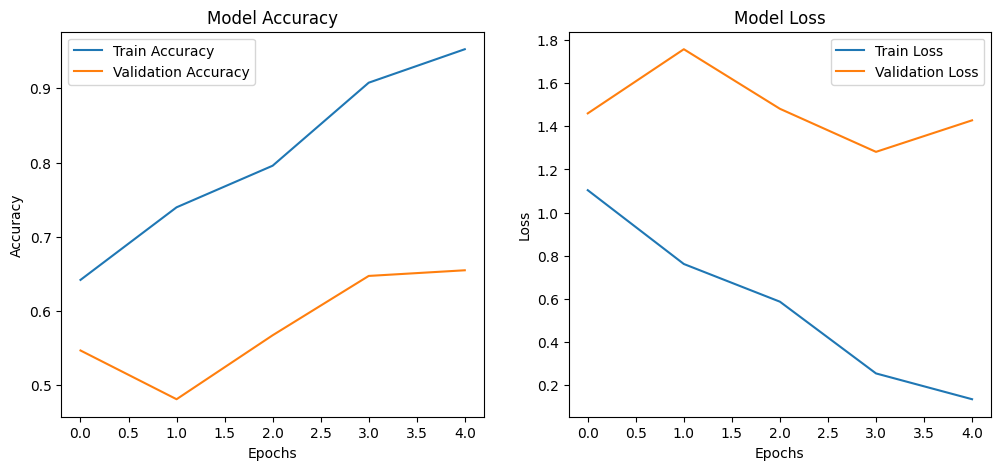

In [31]:
# Step 14 — Plot Accuracy and Loss Graphs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


✅ Final class names (alphabetical): ['Acacia_dealbata', 'Acacia_mearnsii', 'Ageratina_adenophora', 'Ageratum_conyzoides', 'Alternanthera_philoxeroides', 'Amaranthus_spinosus', 'Amaranthus_viridis', 'Argemone_mexicana', 'Biancaea_decapetala', 'Bidens_pilosa', 'Caesalpinia_decapetala', 'Calotropis_procera', 'Cassia_occidentalis', 'Clidemia_hirta', 'Croton_bonplandianus', 'Datura_stramonium', 'Eupatorium_adenophorum', 'Ipomoea_carnea', 'Lantana_camara', 'Leucaena_leucocephala', 'Sphagneticola_trilobata']
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


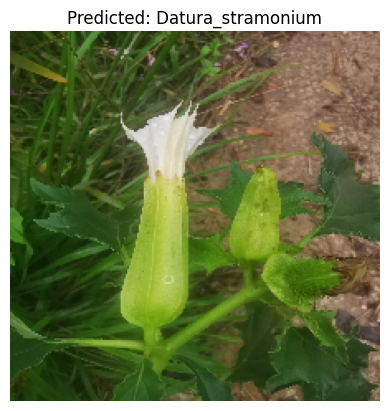

In [36]:
#step 15
# ✅ Rebuild class_names from your dataset folder (alphabetical)
import os, json
filtered_dataset_dir = '/content/filtered_dataset'
class_names = sorted([
    d for d in os.listdir(filtered_dataset_dir)
    if os.path.isdir(os.path.join(filtered_dataset_dir, d))
])
print("✅ Final class names (alphabetical):", class_names)

# (Optional) Save them for future runs
with open('/content/drive/MyDrive/class_names.json', 'w') as f:
    json.dump(class_names, f)

# ✅ Load trained model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model = load_model('/content/drive/MyDrive/invasives_final_model.keras')

# ✅ Correct preprocessing for EfficientNet
img_path = '/content/filtered_dataset/Datura_stramonium/322012312_582451729.jpg'  # test image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_preprocessed = preprocess_input(np.expand_dims(img_array, axis=0))

pred = model.predict(img_preprocessed)
predicted_index = np.argmax(pred)
predicted_label = class_names[predicted_index]

plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_label}")
plt.show()


In [38]:
#Top 3 probabilities:
probs = pred[0]
top_indices = probs.argsort()[-3:][::-1]
print("Top-3 predictions:")
for i in top_indices:
    print(f"{class_names[i]} → {probs[i]*100:.2f}%")


Top-3 predictions:
Datura_stramonium → 99.90%
Croton_bonplandianus → 0.04%
Ageratum_conyzoides → 0.02%


Saving WhatsApp Image 2025-10-30 at 3.10.36 PM.jpeg to WhatsApp Image 2025-10-30 at 3.10.36 PM (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


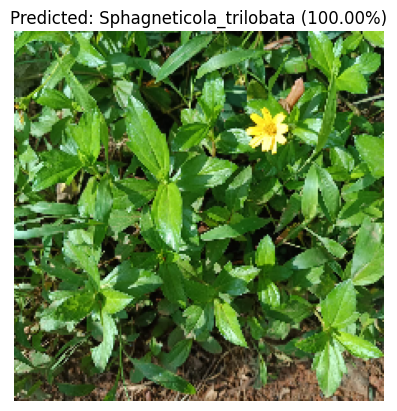

✅ Predicted invasive species: Sphagneticola_trilobata
Confidence: 100.00%

Top-3 predictions:
Sphagneticola_trilobata → 100.00%
Bidens_pilosa → 0.00%
Alternanthera_philoxeroides → 0.00%


In [40]:
# Uploading own images:
from google.colab import files
uploaded = files.upload()
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt

# replace with your uploaded filename
img_path = 'WhatsApp Image 2025-10-30 at 3.10.36 PM.jpeg'

# Load & preprocess
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_preprocessed = preprocess_input(np.expand_dims(img_array, axis=0))

# Predict
pred = model.predict(img_preprocessed)
predicted_index = np.argmax(pred)
predicted_label = class_names[predicted_index]
confidence = np.max(pred) * 100

# Display result
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%)")
plt.show()

print("✅ Predicted invasive species:", predicted_label)
print(f"Confidence: {confidence:.2f}%")

probs = pred[0]
top_indices = probs.argsort()[-3:][::-1]
print("\nTop-3 predictions:")
for i in top_indices:
    print(f"{class_names[i]} → {probs[i]*100:.2f}%")


In [ ]:
from google.colab import files

model.save("invasive_model.h5")  # saves in Colab temporary space
files.download("invasive_model.h5")
